# Machine Learning for Prediction of Product Sales

### The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

### File descriptions
sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.

test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.

sample_submission.csv - a sample submission file in the correct format.

items.csv - supplemental information about the items/products.

item_categories.csv  - supplemental information about the items categories.

shops.csv- supplemental information about the shops.

## Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Import Datasets

In [2]:
items_cat = pd.read_csv('../input/competitive-data-science-predict-future-sales/item_categories.csv')
items = pd.read_csv('../input/competitive-data-science-predict-future-sales/items.csv')
shops = pd.read_csv('../input/competitive-data-science-predict-future-sales/shops.csv')
test = pd.read_csv('../input/competitive-data-science-predict-future-sales/test.csv')
train = pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv')

# Exploratory Data Analysis

In [3]:
items_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
items_cat.describe()

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [7]:
items['item_category_id'].value_counts()

40    5035
55    2365
37    1780
31    1125
58     790
      ... 
1        2
50       2
10       1
51       1
79       1
Name: item_category_id, Length: 84, dtype: int64

### Maximum items sold belong to item category 40.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='item_category_id', ylabel='count'>

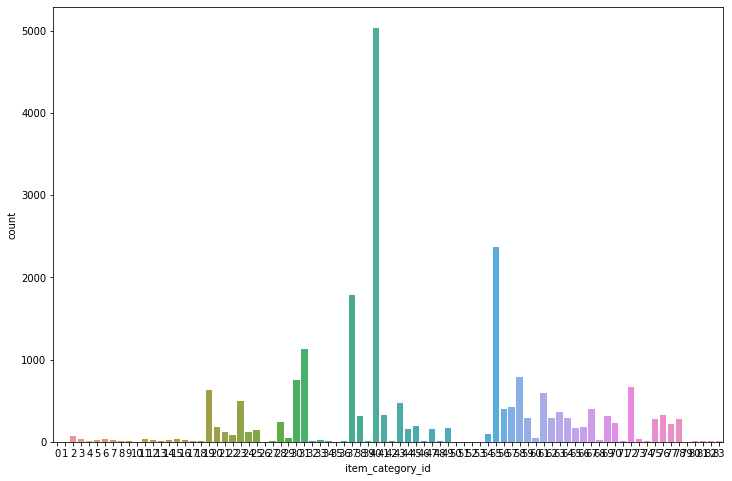

In [8]:
plt.figure(figsize = (12,8))
sns.countplot(items['item_category_id'])

In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [10]:
shops.describe()

,shop_id
count,60.000000
mean,29.500000
std,17.464249
min,0.000000
25%,14.750000
50%,29.500000
75%,44.250000
max,59.000000


In [11]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [12]:
train['date'] = pd.to_datetime(train['date'])

In [13]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [14]:
train.corr()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date_block_num,1.000000,0.019273,0.009356,0.095010,0.009402
shop_id,0.019273,1.000000,0.029396,-0.024034,-0.005230
item_id,0.009356,0.029396,1.000000,-0.134104,0.016650
item_price,0.095010,-0.024034,-0.134104,1.000000,0.011197
item_cnt_day,0.009402,-0.005230,0.016650,0.011197,1.000000


<AxesSubplot:>

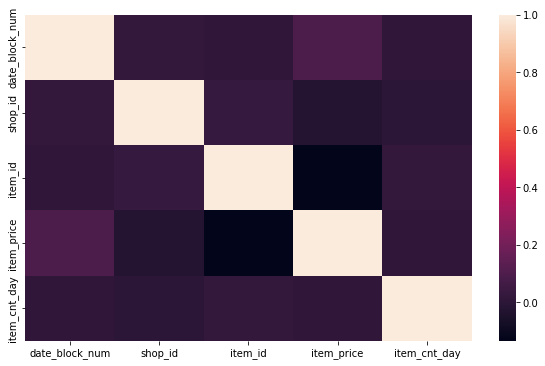

In [15]:
plt.figure(figsize = (10,6))
sns.heatmap(train.corr())

<AxesSubplot:xlabel='item_price', ylabel='item_id'>

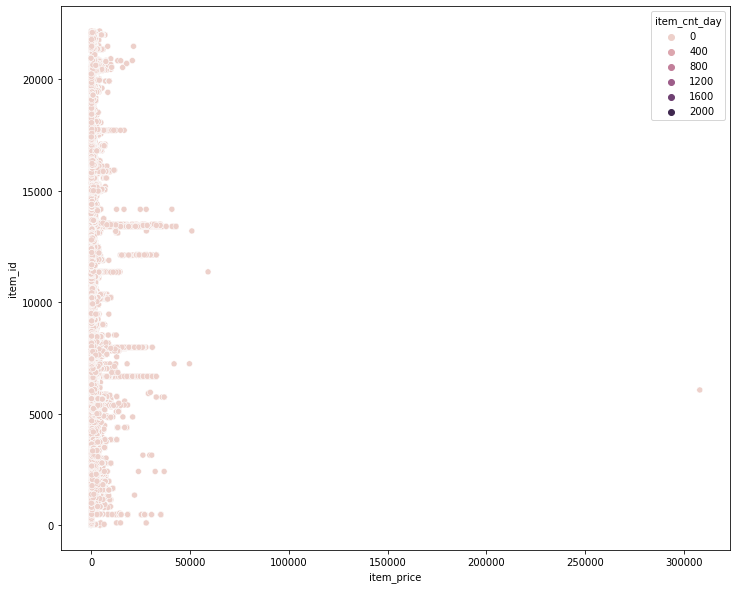

In [16]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = 'item_price', y = 'item_id', data = train, hue = 'item_cnt_day' )

In [17]:
test.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [18]:
monthly = train.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index()

In [19]:
monthly.describe()

,date_block_num,item_cnt_day
count,34.000000,34.000000
mean,16.500000,107300.176471
std,9.958246,28456.020577
min,0.000000,63187.000000
25%,8.250000,85968.500000
50%,16.500000,107306.000000
75%,24.750000,125358.500000
max,33.000000,183342.000000


<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

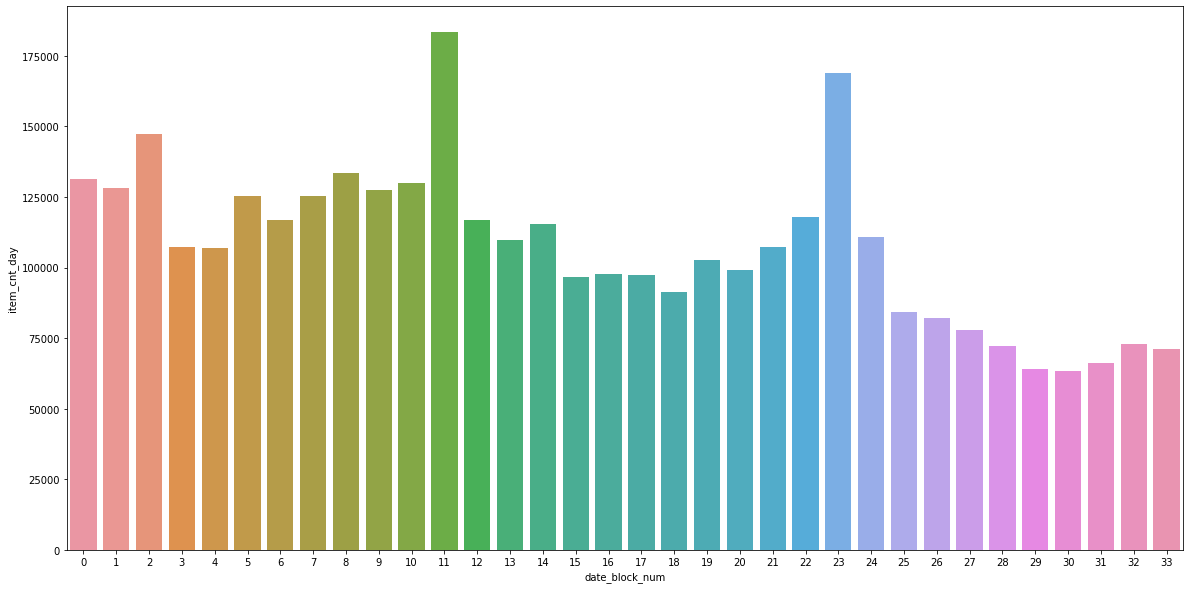

In [20]:
plt.figure(figsize = (20, 10))
sns.barplot(x = monthly['date_block_num'], y = monthly['item_cnt_day'], data = train)

# Transforming dataset into target and independent variables

In [21]:
x = train[['shop_id', 'item_id']].values
y = train['item_cnt_day'].values

In [22]:
x

array([[   59, 22154],
       [   25,  2552],
       [   25,  2552],
       ...,
       [   25,  7459],
       [   25,  7440],
       [   25,  7460]])

# Scaling

In [23]:
y

array([ 1.,  1., -1., ...,  1.,  1.,  1.])

In [24]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)

StandardScaler()

# Train and Test Split

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state =0)

In [26]:
x_train

array([[   35, 11549],
       [   26,  1540],
       [   47,  3705],
       ...,
       [   57, 16182],
       [   56, 10967],
       [   28,  6495]])

In [27]:
x_test

array([[   31, 13688],
       [   25,  7856],
       [   42, 20091],
       ...,
       [   59,  5361],
       [   54,  4032],
       [   46, 16517]])

In [28]:
y_train

array([ 1., 20.,  1., ...,  1.,  1.,  2.])

In [29]:
y_test

array([1., 2., 1., ..., 1., 1., 1.])

# Model Fitting

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
y_predicted = regressor.predict(x_test)

In [32]:
np.set_printoptions(precision=2)
print(np.concatenate((y_predicted.reshape(len(y_predicted),1), y_test.reshape(len(y_test),1)),1))

[[1.27 1.  ]
 [1.23 2.  ]
 [1.3  1.  ]
 ...
 [1.19 1.  ]
 [1.18 1.  ]
 [1.27 1.  ]]


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Performance Evaluation

In [34]:
print('MSE',mean_squared_error(y_test,y_predicted))
print('MAE',mean_absolute_error(y_test,y_predicted))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_predicted)))

MSE 5.66544875792455
MAE 0.4451031981450124
RMSE 2.380220317097674


## Decision Tree


In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(random_state = 0)
regressor_DT.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [36]:
y_pred = regressor_DT.predict(x_test)

In [37]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.   1.  ]
 [1.58 2.  ]
 [1.   1.  ]
 ...
 [1.28 1.  ]
 [1.   1.  ]
 [1.   1.  ]]


In [38]:
print('MSE',mean_squared_error(y_test,y_predicted))
print('MAE',mean_absolute_error(y_test,y_predicted))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_predicted)))

MSE 5.66544875792455
MAE 0.4451031981450124
RMSE 2.380220317097674


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [40]:
y_predicted = regressor.predict(x_test)

In [41]:
np.set_printoptions(precision=2)
print(np.concatenate((y_predicted.reshape(len(y_predicted),1), y_test.reshape(len(y_test),1)),1))

[[1.   1.  ]
 [1.59 2.  ]
 [1.   1.  ]
 ...
 [1.27 1.  ]
 [1.   1.  ]
 [1.   1.  ]]


In [42]:
print('MSE',mean_squared_error(y_test,y_predicted))
print('MAE',mean_absolute_error(y_test,y_predicted))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_predicted)))

MSE 4.0217604761725
MAE 0.3297904087378054
RMSE 2.0054327403761265


## K nearest Kneighbors

In [43]:
from sklearn import neighbors

In [44]:
rmse_val = []
for K in range(40):
    K = K+1
    regressor = neighbors.KNeighborsRegressor(n_neighbors = K)

    regressor.fit(x_train, y_train) 
    y_predicted = regressor.predict(x_test) 
    error = np.sqrt(mean_squared_error(y_test,y_predicted))
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.263528949777619
RMSE value for k=  2 is: 2.7351272727772837
RMSE value for k=  3 is: 2.522433630477548
RMSE value for k=  4 is: 2.4049365167544012
RMSE value for k=  5 is: 5.92118185781142
RMSE value for k=  6 is: 5.0904631744848405
RMSE value for k=  7 is: 4.510566996353156
RMSE value for k=  8 is: 4.0793235061095325
RMSE value for k=  9 is: 3.755957876564512
RMSE value for k=  10 is: 3.514399436673587
RMSE value for k=  11 is: 3.3179912698167944
RMSE value for k=  12 is: 3.164606971656444
RMSE value for k=  13 is: 3.0423249379815616
RMSE value for k=  14 is: 2.9407788792493896
RMSE value for k=  15 is: 2.854674295082899
RMSE value for k=  16 is: 2.7892618237690594
RMSE value for k=  17 is: 2.7285269100104523
RMSE value for k=  18 is: 2.6762262985521743
RMSE value for k=  19 is: 2.6303715308076634
RMSE value for k=  20 is: 2.5935820254194626
RMSE value for k=  21 is: 2.5577105025178017
RMSE value for k=  22 is: 2.535713241791306
RMSE value for k=  23 is: 2.5

<AxesSubplot:>

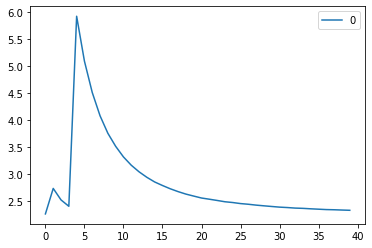

In [45]:
curve = pd.DataFrame(rmse_val)
curve.plot()

## Grid Search for searching of best parameter

In [46]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 70}

In [47]:
regressor = neighbors.KNeighborsRegressor(n_neighbors = 1)
regressor.fit(x_train, y_train) 

KNeighborsRegressor(n_neighbors=1)

### Best param selected is 70. But we have the same accuracy if we take K = 1. Therfore we will go for K = 1

In [48]:
  y_predicted = regressor.predict(x_test)

In [49]:
np.set_printoptions(precision=2)
print(np.concatenate((y_predicted.reshape(len(y_predicted),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [1. 2.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [50]:
print('MSE',mean_squared_error(y_test,y_predicted))
print('MAE',mean_absolute_error(y_test,y_predicted))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_predicted)))

MSE 5.123563306481371
MAE 0.36634705451572797
RMSE 2.263528949777619


In [51]:
submission = pd.DataFrame(list(zip(test['ID'], y_pred)),
               columns =['ID', 'item_cnt_month'])

In [52]:
submission

,ID,item_cnt_month
0,0,1.000000
1,1,1.579882
2,2,1.000000
3,3,1.000000
4,4,1.045455
...,...,...
214195,214195,1.000000
214196,214196,1.055556
214197,214197,1.000000
214198,214198,1.000000


In [53]:
submission.to_csv('submission.csv',index = False)

## Comparing the algorithms on the basis of RMSE, It was found that Decision Tree wins the race with lowest RMSE of 1.94.